# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_dat = pd.read_csv(mouse_metadata_path)
study_dat = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_dat = pd.merge(mouse_dat, study_dat, on="Mouse ID")

# Display the data table for preview
combo_dat.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Verify the number of mice.
NumCount = combo_dat['Mouse ID'].nunique()
print(NumCount)


249


In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DupeID = combo_dat[combo_dat.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
DupeID_array = np.array(DupeID)
print(DupeID_array)

['g989']


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
DupeID_filtered_in = combo_dat.loc[combo_dat["Mouse ID"]=="g989",:]
DupeID_filtered_in

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
DupeID_filtered_out = combo_dat.loc[combo_dat["Mouse ID"]!= "g989", :]
DupeID_filtered_out

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
NumCount_new = DupeID_filtered_out['Mouse ID'].nunique()
print(NumCount_new)

248


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
pymac_gp = DupeID_filtered_out.groupby("Drug Regimen")
# get the first value of each group
drug_reg = pymac_gp["Drug Regimen"].first()
tumor_mean = pymac_gp["Tumor Volume (mm3)"].mean()
tumor_med = pymac_gp['Tumor Volume (mm3)'].median()
tumor_var = pymac_gp["Tumor Volume (mm3)"].var()
tumor_std = pymac_gp["Tumor Volume (mm3)"].std()
tumor_sem = pymac_gp["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Drug Regimen":drug_reg, "Mean Tumor Vol":tumor_mean, 
                         "Median Tumor Vol":tumor_med, "Tumor Vol Variance":tumor_var,
                        "Tumor Vol SD":tumor_std, "Tumor Vol SEM":tumor_sem})

tumor_df.head(11)


,Drug Regimen,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol SD,Tumor Vol SEM
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

tumor_agg = DupeID_filtered_out.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg([np.mean,
                                                                                   np.median,
                                                                                   np.var,
                                                                                   np.std,
                                                                                   st.sem])
tumor_agg.head(11)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

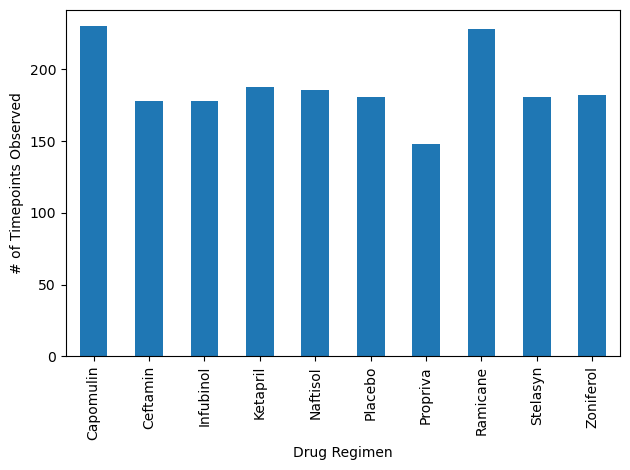

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Rx_group = DupeID_filtered_out.groupby("Drug Regimen")
Rx_count = Rx_group["Drug Regimen"].count()

# Create the bar chart
Rx_count_plot = Rx_count.plot(kind='bar')
Rx_count_plot.set_xlabel('Drug Regimen')
Rx_count_plot.set_ylabel('# of Timepoints Observed')

# Display the chart
plt.tight_layout()
plt.show()

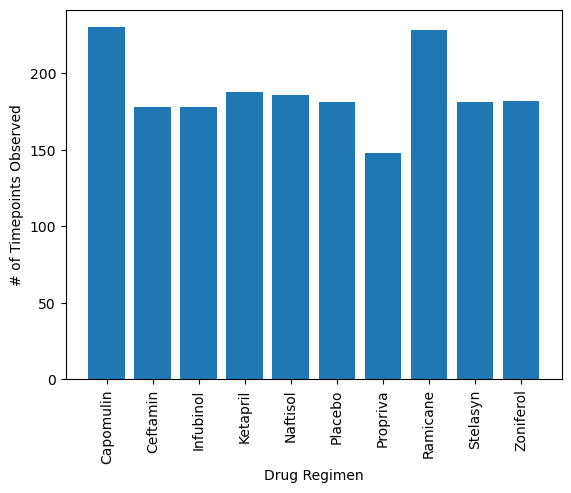

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Assign variables for x and y axis
Rx_x = Rx_count.index
Rx_y = Rx_count.values

#Create the bar chart
plt.bar(Rx_x, Rx_y, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints Observed')
plt.xticks(rotation="vertical")

# Display the chart
plt.show()


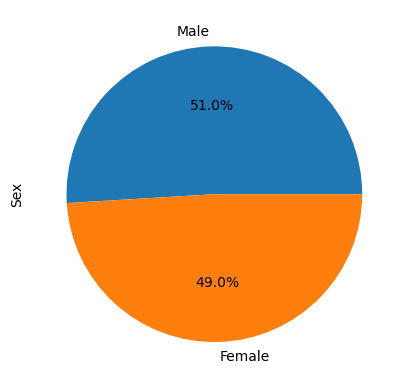

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a new dataframe
genderDF = pd.DataFrame([958, 922], index=['Male', 'Female'], columns=['Sex'])

# Create the pie chart
genderDF.plot(kind="pie", subplots=True, autopct='%1.1f%%', legend=False)

# Display the chart
plt.show()


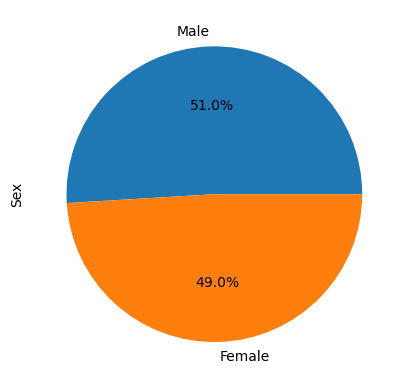

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a new dataframe excluding all columns except target data
PySex = pd.DataFrame(DupeID_filtered_out["Sex"])

# Calculate the percentage
PySex_pct = PySex['Sex'].value_counts(normalize=True)*100

# Create the pie chart
plt.pie(PySex_pct, labels=PySex_pct.index, autopct='%1.1f%%')
plt.ylabel('Sex', rotation='vertical')
plt.show()


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
MaxTime_filter = DupeID_filtered_out[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
MaxTime_filter2 = MaxTime_filter.loc[(MaxTime_filter["Drug Regimen"]=="Capomulin")|
                                     (MaxTime_filter["Drug Regimen"]=="Ceftamin")|
                                     (MaxTime_filter["Drug Regimen"]=="Infubinol")|
                                     (MaxTime_filter["Drug Regimen"]=="Ramicane"),:]

# Start by getting the last (greatest) timepoint for each mouse
MaxTime = MaxTime_filter2.loc[MaxTime_filter2.groupby('Mouse ID')['Timepoint'].idxmax()]

# Filter new dataset to exclude any Mouse ID with only one Timepoint
# Reason: The study only benefits from looking at how a drug performs over time.
# A minimum of two Timepoints are needed.
MaxTime = MaxTime.loc[(MaxTime["Timepoint"]!=0)]
MaxTime = MaxTime.sort_values("Mouse ID")
MaxTime = MaxTime.reset_index(drop=True)



In [50]:
# Put treatments into a list for for loop (and later for plot labels)
IQR_vals = MaxTime['Drug Regimen'].unique()

for value in IQR_vals:
    IQR_vol = MaxTime.loc[MaxTime['Drug Regimen']==value, 'Tumor Volume (mm3)'] 

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    lowerq = IQR_vol.quantile(0.25)
    upperq = IQR_vol.quantile(0.75)
    IQR = upperq-lowerq
    lowerq_bound = lowerq - 1.5*IQR
    upperq_bound = upperq + 1.5*IQR
    
    # Determine outliers using upper and lower bounds
    outliers = IQR_vol.loc[(IQR_vol < lowerq_bound) | (IQR_vol > upperq_bound)]
    print(f"{value}'s potential outliers: {outliers}")


Infubinol's potential outliers: 14    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


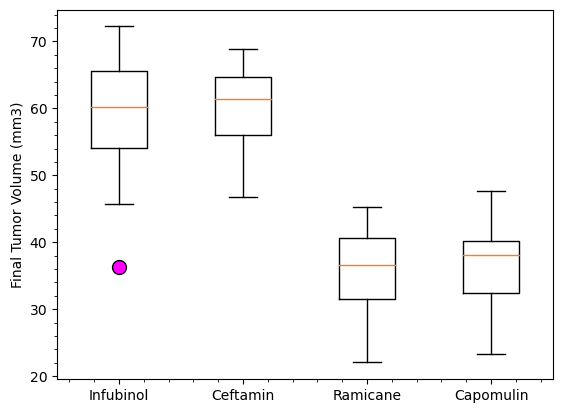

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Infubinol = MaxTime.loc[MaxTime["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
Ceftamin = MaxTime.loc[MaxTime["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
Ramicane = MaxTime.loc[MaxTime["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
Capomulin = MaxTime.loc[MaxTime["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]

regimen_df = pd.DataFrame({"Infubinol":Infubinol, "Ceftamin":Ceftamin,
                           "Ramicane":Ramicane, "Capomulin":Capomulin})

# Generate the boxplot
regimen_bp = plt.boxplot([Infubinol, Ceftamin, Ramicane, Capomulin], 
                         labels=['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'],
                         flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})

plt.ylabel('Final Tumor Volume (mm3)')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor')
plt.tick_params(axis='x', which='major')
plt.show()


## Line and Scatter Plots

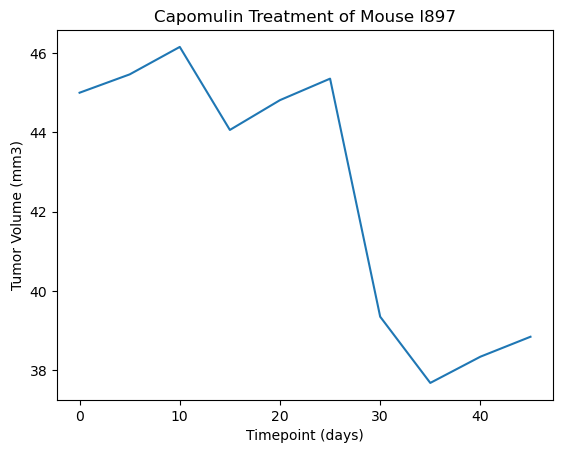

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l897_df = DupeID_filtered_out.loc[(DupeID_filtered_out["Mouse ID"]=="l897")]
l897_df = l897_df[['Timepoint', 'Tumor Volume (mm3)']]
l897_df = l897_df.reset_index(drop=True)

TPs = l897_df['Timepoint']
Tvol = l897_df['Tumor Volume (mm3)']

# Create the line plot
plt.plot(TPs, Tvol)

# Set the labels for the x-axis and y-axis
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title of the plot
plt.title('Capomulin Treatment of Mouse l897')

# Display the plot
plt.show()


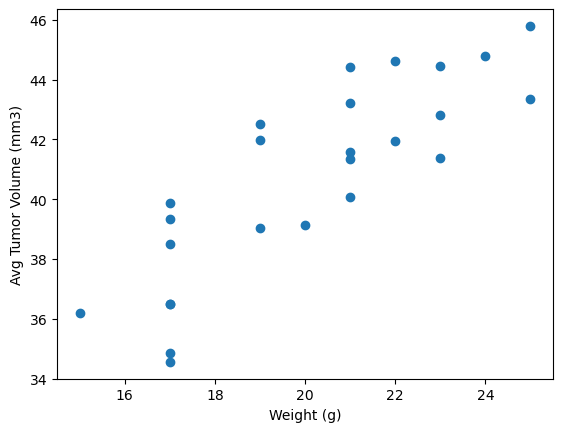

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Extract only records with mice treated with Capomulin
wt_rate = DupeID_filtered_out.loc[(DupeID_filtered_out["Drug Regimen"]=="Capomulin")]

# Reduce columns
wt_rate = wt_rate[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

# Group by Mouse ID
gpb_mouse = wt_rate.groupby('Mouse ID')

# Extract the weight for each mouse and create a new dataframe
unique_mouse = gpb_mouse['Weight (g)'].first()

# Calculate the average tumor volume for each mouse
gpb_mouse = gpb_mouse['Tumor Volume (mm3)'].mean()

# Merge the two dataframes to bring the data back together
tumor_plot = pd.merge(unique_mouse, gpb_mouse, on="Mouse ID")

# Extract the columns from the dataframe
mouse_wt = tumor_plot['Weight (g)']
tumor_wt = tumor_plot['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(mouse_wt, tumor_wt)

# Set the labels for the x-axis and y-axis
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


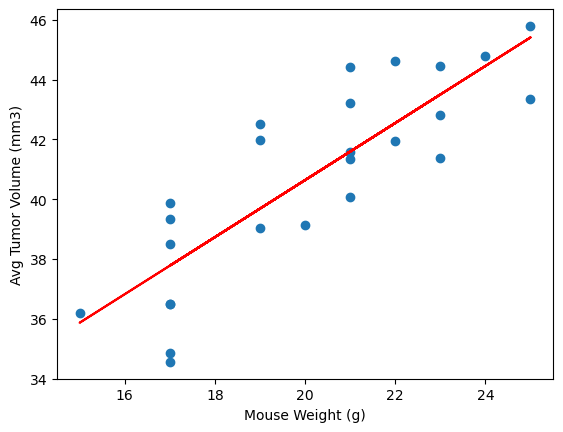

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = np.corrcoef(mouse_wt, tumor_wt)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_wt, tumor_wt)

# Create the line graph
plt.scatter(mouse_wt, tumor_wt, label='Data Points')
plt.plot(mouse_wt, intercept + slope * mouse_wt, color='red', label='Linear Regression')

# Set the labels for the x-axis and y-axis
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Display the plot
plt.show()
